In [2]:

#from arcpy.sa import *  
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

ImportError: DLL load failed: The specified module could not be found.

In [3]:
#gis = GIS("https://www.arcgis.com", "******", "*****")  # accesso utente con account
gis = GIS()                                                          # accesso utente anonimo

In [4]:
#Lettura csv
csv1 = 'resources/stazioni_qualità_dell_aria.csv'
sensori_1 = pd.read_csv(csv1)
sensori_1.head()


,IdSensore,NomeTipoSensore,UnitaMisura,Idstazione,NomeStazione,Quota,Provincia,Comune,Storico,DataStart,DataStop,Utm_Nord,UTM_Est,lat,lng,location
0,10179,Biossido di Azoto,µg/m³,704,Sermide - via Dalla Chiesa,11.0,MN,Sermide e Felonica,S,29/11/2006,01/01/2017,4986023,680789,45.004614,11.294015,"(45.004613731114105, 11.294014707706845)"
1,10177,Ossidi di Azoto,µg/m³,704,Sermide - via Dalla Chiesa,11.0,MN,Sermide e Felonica,S,29/11/2006,01/01/2017,4986023,680789,45.004614,11.294015,"(45.004613731114105, 11.294014707706845)"
2,10185,PM10 (SM2005),µg/m³,704,Sermide - via Dalla Chiesa,11.0,MN,Sermide e Felonica,S,01/01/2007,01/01/2017,4986023,680789,45.004614,11.294015,"(45.004613731114105, 11.294014707706845)"
3,10399,Particelle sospese PM2.5,µg/m³,583,Bergamo - via Meucci,249.0,BG,Bergamo,N,20/12/2008,NaN,5059922,550116,45.691037,9.643651,"(45.69103740547214, 9.643650579461385)"
4,6642,Particolato Totale Sospeso,µg/m³,542,Meda,222.0,MB,Meda,S,01/11/1995,04/02/1998,5056480,512203,45.661762,9.156644,"(45.66176219189168, 9.156643984551597)"


In [5]:
# Leggere csv2
csv2 = 'resources/sensori_aria_2020_03_to_05_VA.csv'
sensori_2 = pd.read_csv(csv2)
sensori_2.head()
#sensori_2.shape

,IdSensore,Data,Valore,Stato,idOperatore
0,6411,01/01/2020 00:00,1.0,VA,1
1,5504,01/01/2020 00:00,125.0,VA,1
2,5507,01/01/2020 00:00,63.8,VA,1
3,5517,01/01/2020 00:00,68.7,VA,1
4,5520,01/01/2020 00:00,20.5,VA,1


In [6]:
# Media per sensore
sensori_2_media = sensori_2.groupby("IdSensore").mean()



In [7]:
table_2020 = pd.merge(sensori_1[sensori_1["NomeTipoSensore"]=="Ossidi di Azoto"], sensori_2_media, how='inner', on=['IdSensore'])
# table.Valore = list(map(lambda x:x if x>-500 else -500,table.Valore))  non serve più selezioniamo VA da csv

In [8]:
# Create a output path for the data
outfp = "output/output.shp"

In [9]:
# Dataframe to GeoDataFrame
gdf = gpd.GeoDataFrame(
      table_2020, geometry=gpd.points_from_xy(table_2020.lng, table_2020.lat))
#gdf

In [10]:
# Generazione shape file
gdf.to_file(outfp)

In [11]:
# Lettura shape file
fp = "output/output.shp"
data = gpd.read_file(fp)

In [ ]:
shape = gpd.read_file('resources/regione/regione_2015.shp')
shape.to_crs(epsg=4326, inplace=True)

Text(0.5, 298.31264747739306, 'Longitude')

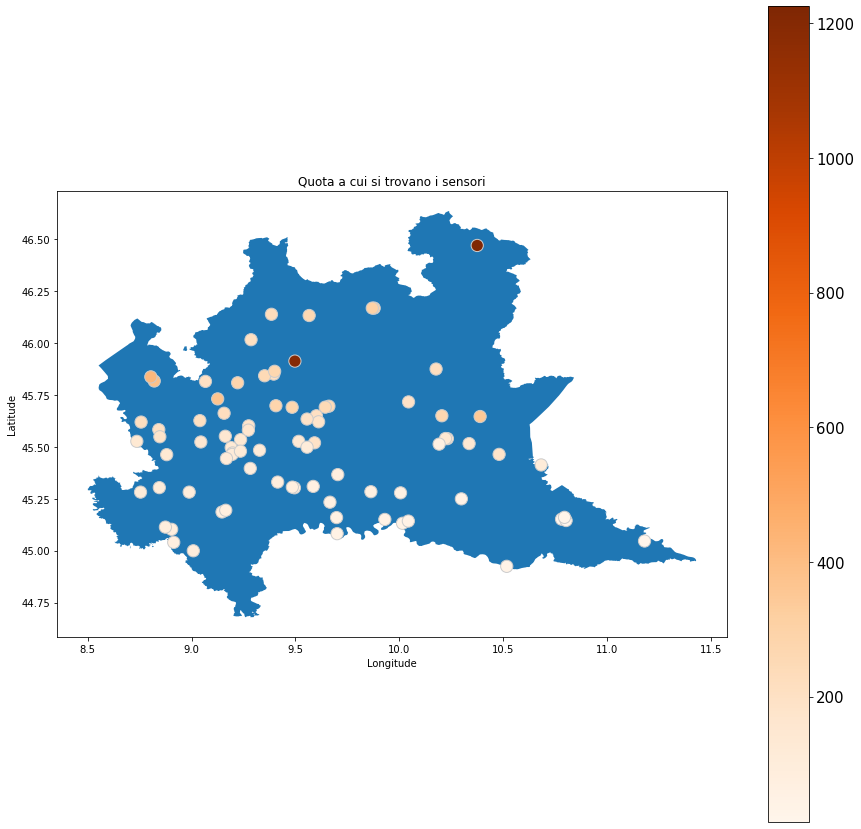

In [92]:
# Grafico per quota dei sensori

fig,ax = plt.subplots(1,figsize=(15,15))

color = 'Oranges'
vmin, vmax = np.min(table.Quota),np.max(table.Quota)
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=15)


shape.plot(ax=ax)
data.plot('Quota',ax=ax, cmap='Oranges',edgecolor='0.8', markersize=150)
plt.title('Quota a cui si trovano i sensori')
plt.ylabel('Latitude')
plt.xlabel('Longitude')


Text(0.5, 404.7501966365241, 'Longitude')

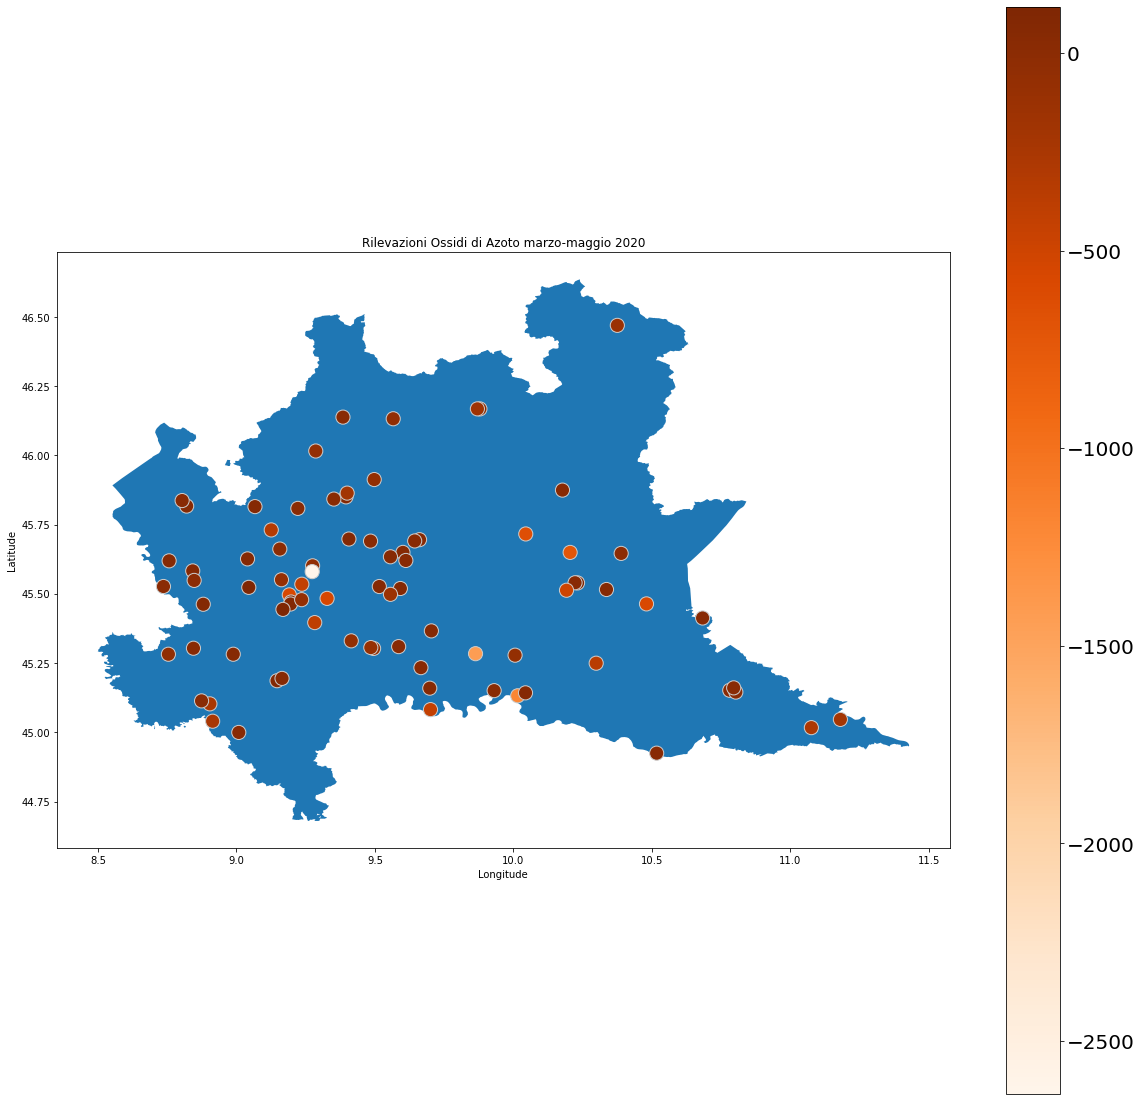

In [93]:
# Grafico rilevazioni Ossidi di Azoto

fig,ax = plt.subplots(1,figsize=(20,20))

color = 'Oranges'
vmin, vmax = np.min(table.Valore) ,np.max(table.Valore)
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)


shape.plot(ax=ax)
data.plot('Valore',ax=ax, cmap='Oranges',edgecolor='0.8', markersize=200)
plt.title('Rilevazioni Ossidi di Azoto marzo-maggio 2020')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

In [94]:
# --- JOIN CSV 2019 ---

In [95]:
# Leggere csv1 
csv1 = 'resources/stazioni_qualità__dell_aria.csv'
sensori_1 = pd.read_csv(csv1)
sensori_1.head()
sensori_1.shape

(951, 16)

In [96]:
csv2 = 'resources/sensori_aria_2019_03_to_05_VA.csv'
sensori_2 = pd.read_csv(csv2)
sensori_2.head()
sensori_2.shape

(1048575, 5)

In [97]:
sensori_2_media = sensori_2.groupby("IdSensore").mean()

In [98]:
table_2019 = pd.merge(sensori_1[sensori_1["NomeTipoSensore"]=="Ossidi di Azoto"], sensori_2_media, how='inner', on=['IdSensore'])
# table.Valore = list(map(lambda x:x if x>-500 else -500,table.Valore))  non serve più selezioniamo VA da csv
table.head()

,IdSensore,NomeTipoSensore,UnitaMisura,Idstazione,NomeStazione,Quota,Provincia,Comune,Storico,DataStart,DataStop,Utm_Nord,UTM_Est,lat,lng,location,Valore,idOperatore,geometry
0,6364,Ossidi di Azoto,µg/m³,517,Turbigo,141.0,MI,Turbigo,N,11/01/1990,NaN,5041480,479423,45.526551,8.736497,"(45.52655086994247, 8.736496578379215)",19.036258,1,POINT (8.73650 45.52655)
1,6248,Ossidi di Azoto,µg/m³,574,Lecco - Via Amendola,214.0,LC,Lecco,N,01/01/1991,NaN,5077479,530713,45.850191,9.395577,"(45.850191194578535, 9.395577066893223)",65.894256,1,POINT (9.39558 45.85019)
2,6784,Ossidi di Azoto,µg/m³,652,Brescia - via Turati,154.0,BS,Brescia,N,01/10/1999,NaN,5043626,596168,45.539529,10.231786,"(45.539529434955995, 10.231785907477223)",104.458657,1,POINT (10.23179 45.53953)
3,9918,Ossidi di Azoto,µg/m³,664,Mantova - p.zza Gramsci,18.0,MN,Mantova,N,08/06/2004,NaN,5001351,640031,45.151743,10.781408,"(45.151743379576594, 10.78140770009565)",17.274943,1,POINT (10.78141 45.15174)
4,6328,Ossidi di Azoto,µg/m³,501,Milano - viale Marche,129.0,MI,Milano,N,18/09/1980,NaN,5038105,514918,45.496316,9.190934,"(45.49631644365102, 9.190933555313624)",-565.015528,1,POINT (9.19093 45.49632)


In [99]:
# Create a output path for the data
outfp = "output/output.shp"

In [100]:
# Dataframe to GeoDataFrame
gdf = gpd.GeoDataFrame(
      table_2019, geometry=gpd.points_from_xy(table_2019.lng, table_2019.lat))
#gdf

In [101]:
# Generazione shape file
gdf.to_file(outfp)

In [102]:
# Lettura shape file
fp = "output/output.shp"
data = gpd.read_file(fp)

In [103]:
shape = gpd.read_file('resources/regione/regione_2015.shp')
shape.to_crs(epsg=4326, inplace=True)

Text(0.5, 404.7501966365241, 'Longitude')

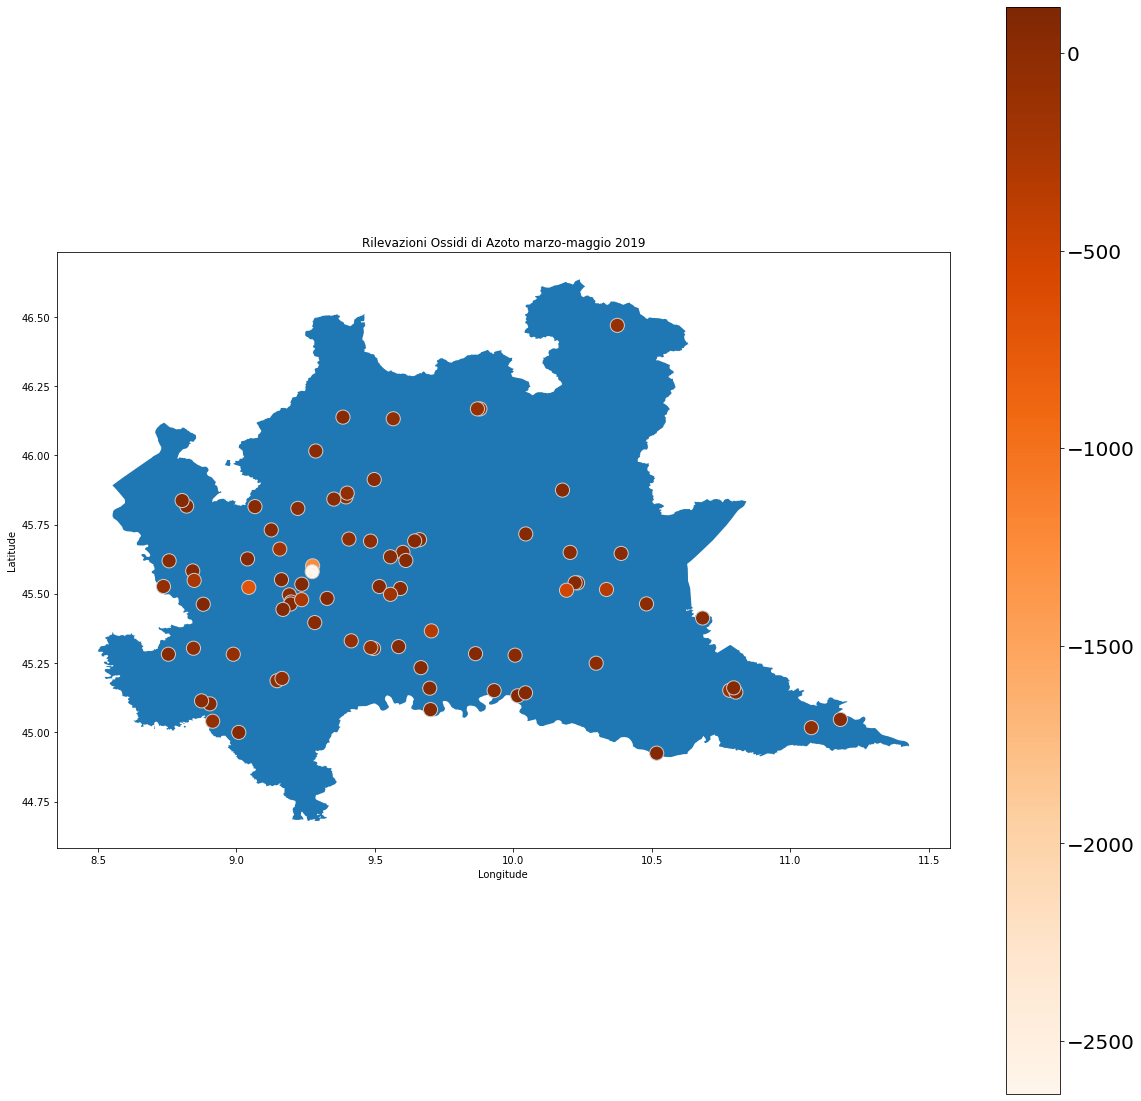

In [104]:
# Grafico rilevazioni Ossidi di Azoto

fig,ax = plt.subplots(1,figsize=(20,20))

color = 'Oranges'
vmin, vmax = np.min(table.Valore) ,np.max(table.Valore)
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)


shape.plot(ax=ax)
data.plot('Valore',ax=ax, cmap='Oranges',edgecolor='0.8', markersize=200)
plt.title('Rilevazioni Ossidi di Azoto marzo-maggio 2019')
plt.ylabel('Latitude')
plt.xlabel('Longitude')